In [87]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pylab as plt
import seaborn as sns
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report,f1_score

# Q1) Import the dataset: Load the data into your analysis environment.

In [88]:
df=pd.read_csv('used_car_cleaned.csv')
df

,car_brand,car_model,car_driven,car_transmission,car_model_year,car_price
0,Hyundai,Tucson,83491.0,Automatic,2018,64000.0
1,Chevrolet,Trailblazer,222000.0,Automatic,2009,20000.0
2,Great,Wall,0.0,Automatic,2022,135000.0
3,Ford,Fusion,178000.0,Automatic,2012,23000.0
4,Mitsubishi,Attrage,10500.0,Automatic,2020,32000.0
...,...,...,...,...,...,...
2282,BMW,7,99000.0,Automatic,2015,103000.0
2283,Ford,Expedition,33000.0,Automatic,2018,185000.0
2284,Chevrolet,Tahoe,48000.0,Automatic,2018,135000.0
2285,Chevrolet,Tahoe,50000.0,Automatic,2018,135000.0


In [ ]:
# First we read a CSV file named used_car_cleaned.csv into a pandas DataFrame called df, allowing for easy manipulation and analysis of the dataset.

# By executing df, we can view the contents of the DataFrame, which includes various columns representing attributes of used cars, such as price,
#transmission type, mileage, year, brand and model of car.

# Q2) Display records: Show the first 5 and last 5 records of the dataset.

In [89]:
df=pd.read_csv('used_car_cleaned.csv')
df.head(5)

,car_brand,car_model,car_driven,car_transmission,car_model_year,car_price
0,Hyundai,Tucson,83491.0,Automatic,2018,64000.0
1,Chevrolet,Trailblazer,222000.0,Automatic,2009,20000.0
2,Great,Wall,0.0,Automatic,2022,135000.0
3,Ford,Fusion,178000.0,Automatic,2012,23000.0
4,Mitsubishi,Attrage,10500.0,Automatic,2020,32000.0


In [ ]:
#The code df.head(5) displays the first five rows of the DataFrame df, providing a quick glimpse of the dataset's concluding entries.

In [8]:
df.tail(5)

,car_brand,car_model,car_driven,car_transmission,car_model_year,car_price
2282,BMW,7,99000.0,Automatic,2015,103000.0
2283,Ford,Expedition,33000.0,Automatic,2018,185000.0
2284,Chevrolet,Tahoe,48000.0,Automatic,2018,135000.0
2285,Chevrolet,Tahoe,50000.0,Automatic,2018,135000.0
2286,Hyundai,Sonata,76000.0,Automatic,2016,73000.0


In [ ]:
# The code df.tail(5) displays the last five rows of the DataFrame df, providing a quick glimpse of the dataset's concluding entries.

# The data has 3 numeric(including 2 floats) and 3 categorical variables.

In [7]:
# The code df.info() provides a summary of the DataFrame df, including the number of entries, column data types, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2287 entries, 0 to 2286
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_brand         2287 non-null   object 
 1   car_model         2287 non-null   object 
 2   car_driven        2287 non-null   float64
 3   car_transmission  2287 non-null   object 
 4   car_model_year    2287 non-null   int64  
 5   car_price         2287 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 107.3+ KB


In [9]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
car_brand,2287,48,Ford,1146,NaN,NaN,NaN,NaN,NaN,NaN,NaN
car_model,2287,219,Expedition,272,NaN,NaN,NaN,NaN,NaN,NaN,NaN
car_driven,2287.0,NaN,NaN,NaN,99620.835155,142545.713568,0.0,18652.0,71188.0,147250.0,4005235.0
car_transmission,2287,3,Automatic,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
car_model_year,2287.0,NaN,NaN,NaN,2014.229996,3.64471,1979.0,2013.0,2015.0,2017.0,2022.0
car_price,2287.0,NaN,NaN,NaN,89559.378225,1046339.527206,123.0,26550.0,51999.0,93450.0,50000000.0


In [ ]:
# The code df.describe(include='all').T generates descriptive statistics for all columns in the DataFrame, including non-numeric data.
# The output is transposed (using .T), allowing for easier reading of statistics such as count, unique values, top values, frequency, mean, standard deviation, minimum, maximum, and quartiles.
# This summary helps to quickly understand the distribution and characteristics of both numeric and categorical features in the dataset.

# Q3) Identify data types: Check and note the data types for each variable.

In [10]:
# df.dtypes displays the data types of each column in the DataFrame, providing insight into the type of data contained in each feature.

df.dtypes

car_brand            object
car_model            object
car_driven          float64
car_transmission     object
car_model_year        int64
car_price           float64
dtype: object

# Q4) Missing entries: Determine the number of missing entries per variable.

In [11]:
# following code returns the total number of missing values for each column in the DataFrame, helping to identify any data quality issues.
df.isna().sum()

car_brand           0
car_model           0
car_driven          0
car_transmission    0
car_model_year      0
car_price           0
dtype: int64

# Q5) Duplicate records: Identify and count any duplicate records.

In [18]:
duplicates = df[df.duplicated()]  

duplicate_count = df.duplicated().sum()

print("Duplicate Records:")
print(duplicates)

print("\nTotal number of duplicate records:", duplicate_count)

Duplicate Records:
      car_brand car_model  car_driven car_transmission  car_model_year  \
9          Ford  Explorer     49000.0        Automatic            2015   
102        Ford      Edge      1682.0        Automatic            2017   
174        Ford      Edge    260000.0        Automatic            2007   
209      Toyota     Camry      3021.0        Automatic            2018   
210      Toyota     Camry      3021.0        Automatic            2018   
...         ...       ...         ...              ...             ...   
2213        BMW        X5       250.0        Automatic            2011   
2214        BMW        X5       250.0        Automatic            2011   
2254       Audi        Q5     47000.0        Automatic            2017   
2256  Chevrolet     Tahoe     60000.0        Automatic            2016   
2265  Chevrolet     Tahoe     60000.0        Automatic            2018   

      car_price  
9       69000.0  
102    134999.0  
174     25000.0  
209     22000.0  
21

In [ ]:
#The code identifies and displays all duplicate records in the DataFrame, helping to assess data quality and integrity.
#It calculates and prints the total number of duplicate records, indicating the extent of redundancy in the dataset.

In [19]:
#getting copy of data ( copy by values)
original_df=df.copy()

# Q6) Univariate analysis: Conduct this analysis on all variables, creating appropriate visualizations.

In [12]:
# The code calculates the frequency of each car brand in the dataset, providing insights into brand distribution.
car_brand_counts = df['car_brand'].value_counts()
car_brand_counts 

car_brand
Ford             1146
Toyota            294
Hyundai           156
Lincoln           114
Kia                92
Chevrolet          79
Nissan             58
Honda              34
GMC                31
BMW                28
Dodge              27
Lexus              23
Mercedes-Benz      23
Renault            21
Mazda              17
Mitsubishi         17
Land               13
Jeep               13
Audi               13
Geely              10
Cadillac            7
Porsche             7
Chrysler            7
MG                  7
Abarth              6
Jaguar              5
Volkswagen          4
Peugeot             4
Suzuki              4
Volvo               3
Maserati            2
Mini                2
Subaru              2
Mercury             2
Changan             2
Fiat                2
Aston               1
GAC                 1
Bentley             1
BAIC                1
Infiniti            1
Chery               1
Foton               1
Isuzu               1
Great               1


Text(0, 0.5, 'Count')

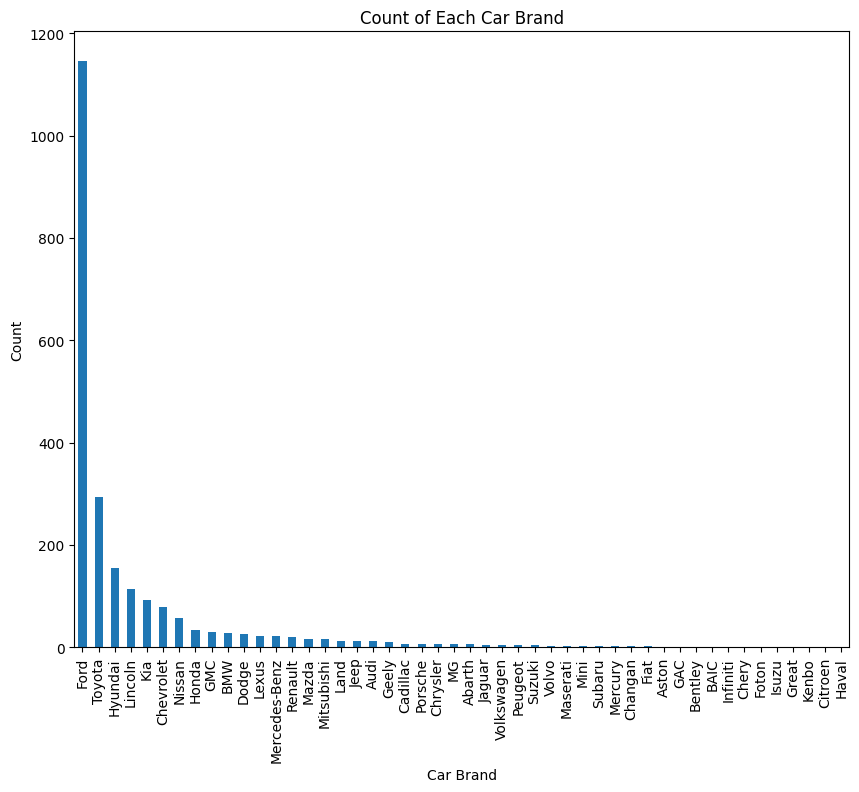

In [859]:
plt.figure(figsize=(10,8))
car_brand_counts .plot.bar()
plt.title('Count of Each Car Brand')
plt.xlabel('Car Brand')
plt.ylabel('Count')

In [ ]:
# The bar plot displays the frequency of each car brand in the dataset, highlighting the most and least common brands.
# It provides a clear visual comparison of the distribution of car brands based on the number of records for each.

In [13]:
# The code calculates the frequency of each car model in the dataset, providing insights into model distribution.
car_model_counts = df['car_model'].value_counts()
car_model_counts 

car_model
Expedition    272
Edge          226
Taurus        170
Explorer      105
Camry         100
             ... 
Suburban        1
Jetta           1
Touareg         1
Passat          1
C-Class         1
Name: count, Length: 219, dtype: int64

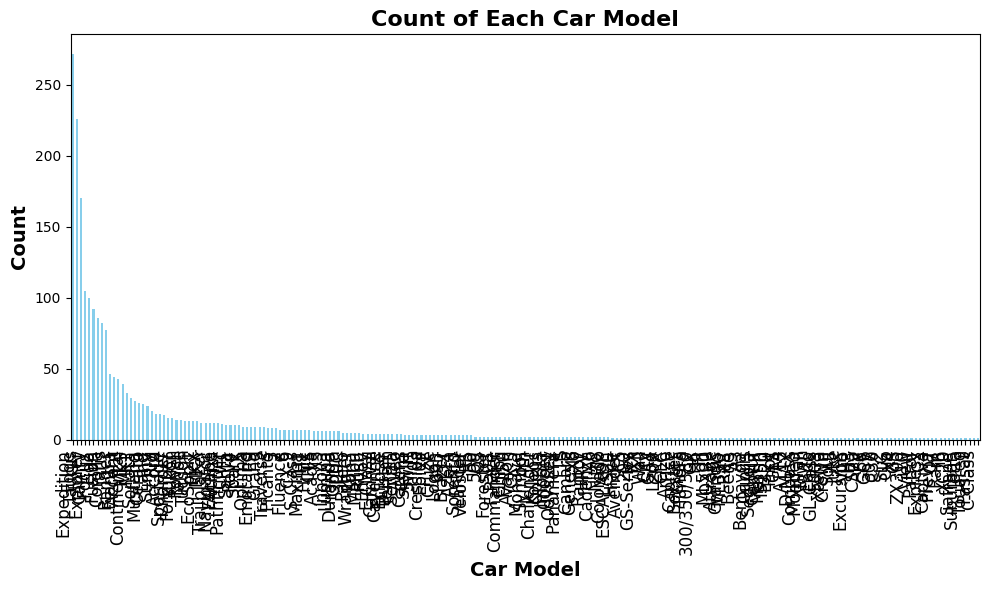

In [797]:
df = pd.read_csv('used_car_cleaned.csv')

car_model_counts = df['car_model'].value_counts()

plt.figure(figsize=(10, 6))
car_model_counts.plot(kind='bar', color='skyblue')  
plt.title('Count of Each Car Model', fontsize=16, fontweight='bold')
plt.xlabel('Car Model', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.xticks(rotation=90, ha='right', fontsize=12)  

plt.tight_layout()
plt.show()

In [791]:
# plt.style.use('default')  # Reset to default style


In [159]:
# # The code calculates the frequency of each car driven in the dataset, providing insights into driven distribution.
car_driven_counts = df['car_driven'].value_counts()
car_driven_counts 

car_driven
300000.0    28
200000.0    28
71188.0     21
28000.0     20
180000.0    16
            ..
92700.0      1
88500.0      1
402050.0     1
251000.0     1
33000.0      1
Name: count, Length: 553, dtype: int64

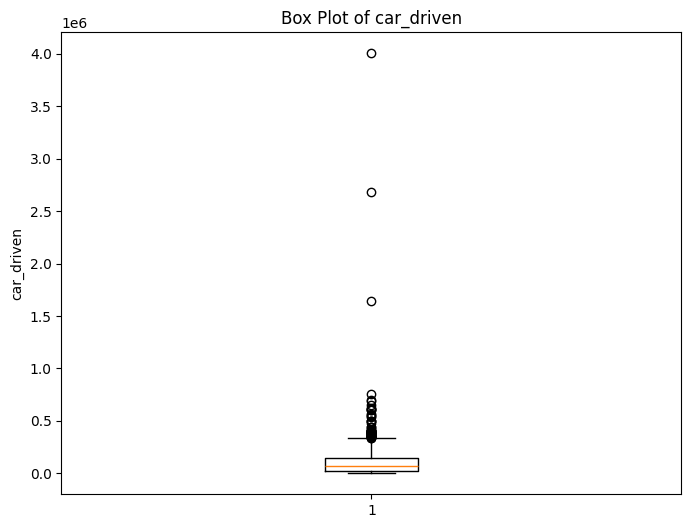

In [795]:
plt.figure(figsize=(8,6))
plt.boxplot(df.car_driven)
plt.ylabel('car_driven')
plt.title('Box Plot of car_driven')
plt.show()

In [ ]:
# The box plot shows the distribution of the variable 'car_driven', highlighting the spread, median, and potential outliers.
# It provides insights into how far cars in the dataset have been driven, along with any extreme values.

In [161]:
# The code calculates the frequency of each car transmission in the dataset, providing insights into transmission distribution.
car_transmission_counts = df['car_transmission'].value_counts()
car_transmission_counts 

car_transmission
Automatic    2076
Manual        137
CVT            74
Name: count, dtype: int64

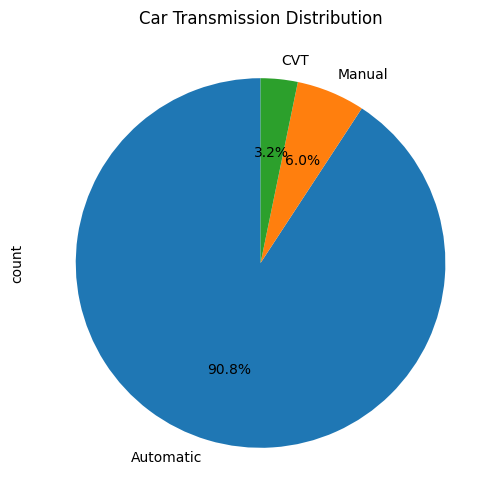

In [597]:
plt.figure(figsize=(8, 6))
car_transmission_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Car Transmission Distribution') 
plt.show()

In [ ]:
# The pie chart visualizes the percentage distribution of different car transmission types in the dataset.
# It provides a clear breakdown of how various transmission types are represented, with percentages labeled for each category.

In [466]:
# The code calculates the frequency of each car model year in the dataset, providing insights into model year distribution.
car_model_year_counts = df['car_model_year'].value_counts()
car_model_year_counts 

car_model_year
2017    446
2016    418
2015    302
2013    251
2014    194
2012    184
2011     68
2018     66
2019     53
2008     45
2010     43
2007     41
2020     40
2009     35
2006     29
2005     24
2002     10
2004      9
1996      6
2021      6
2003      4
1999      3
1992      2
2022      1
1986      1
1998      1
1994      1
2000      1
1979      1
2001      1
1997      1
Name: count, dtype: int64

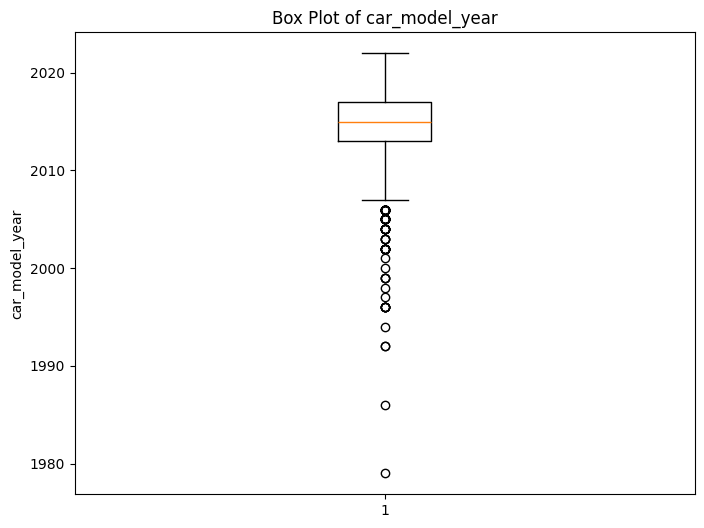

In [164]:
plt.figure(figsize=(8,6))
plt.boxplot(df.car_model_year)
plt.ylabel('car_model_year')
plt.title('Box Plot of car_model_year')
plt.show()

In [ ]:
# The box plot shows the distribution of car model years, identifying the range and any possible outliers.
# It highlights the central values and spread of the car model years within the dataset.

In [165]:
# The code calculates the frequency of each car price in the dataset, providing insights into price distribution.
car_price_year_counts = df['car_price'].value_counts()
car_price_year_counts 

car_price
20999.0     82
134999.0    59
54999.0     57
52500.0     55
45000.0     49
            ..
27500.0      1
47000.0      1
78000.0      1
123.0        1
103000.0     1
Name: count, Length: 262, dtype: int64

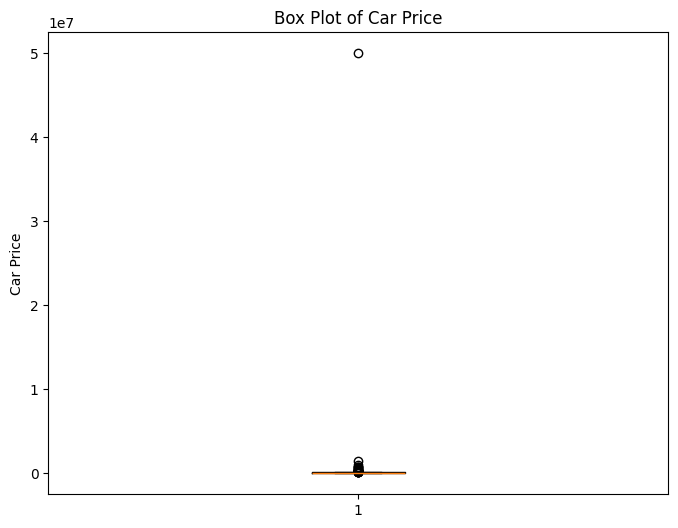

In [743]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['car_price'])
plt.ylabel('Car Price')
plt.title('Box Plot of Car Price')
plt.show()

In [ ]:
# The box plot visualizes the distribution of car prices, highlighting potential outliers.
# It provides a clear view of the spread and central tendency of car prices in the dataset.

# Q7) Outlier detection: Use the Tukey method to identify outliers.

In [20]:
Q1 = df['car_driven'].quantile(0.25)
Q3 = df['car_driven'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['car_driven'] < lower_bound) | (df['car_driven'] > upper_bound)]

print("Outliers detected:")
print(outliers)

print(f"\nNumber of outliers detected: {outliers.shape[0]}")

Outliers detected:
          car_brand car_model  car_driven car_transmission  car_model_year  \
13           Toyota     Camry    410000.0        Automatic            2006   
15            Dodge   Charger    389000.0        Automatic            2008   
18              Kia    Cerato   1640000.0        Automatic            2012   
152         Hyundai   Elantra    370000.0        Automatic            2012   
154          Toyota   Corolla    400000.0              CVT            2016   
345          Toyota     Camry    755000.0        Automatic            2018   
350            Ford  Explorer    360000.0        Automatic            2010   
361         Hyundai    Accent    380000.0        Automatic            2014   
379            Ford      Edge    349970.0        Automatic            2009   
391       Chevrolet   Express    341039.0        Automatic            2011   
394         Hyundai     Azera    360000.0        Automatic            2008   
588         Hyundai    Sonata    625000.0    

In [ ]:
# The interquartile range (IQR) method is used to detect outliers in the 'car_driven' column.
# Outliers are defined as values that fall below the lower bound or above the upper bound calculated using the IQR.
# The total number of detected outliers is printed, helping to identify extreme values in the 'car_driven' feature.

In [21]:
Q1 = df['car_model_year'].quantile(0.25)
Q3 = df['car_model_year'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['car_model_year'] < lower_bound) | (df['car_model_year'] > upper_bound)]

print("Outliers detected:")
print(outliers)

print(f"\nNumber of outliers detected: {outliers.shape[0]}")

Outliers detected:
          car_brand car_model  car_driven car_transmission  car_model_year  \
13           Toyota     Camry    410000.0        Automatic            2006   
150          Toyota     Hilux    185000.0           Manual            2003   
333         Hyundai    Accent    150000.0        Automatic            2005   
374         Hyundai     Santa    290000.0        Automatic            2003   
384   Mercedes-Benz   S-Class    300000.0        Automatic            2005   
...             ...       ...         ...              ...             ...   
2222         Toyota   Corolla    700000.0              CVT            2002   
2229           Land     Rover    250000.0        Automatic            2004   
2234         Toyota      Land       368.0           Manual            2006   
2244  Mercedes-Benz      E320    600000.0        Automatic            1996   
2260            GMC     Yukon     20000.0        Automatic            1997   

      car_price  
13      10000.0  
150     

In [22]:
# The IQR method is applied to detect outliers in the 'car_model_year' column.
# Outliers are values that fall outside the range defined by the lower and upper bounds based on the IQR.
# The number of detected outliers in 'car_model_year' is displayed to identify any unusual data points.

In [15]:
Q1 = df['car_price'].quantile(0.25)
Q3 = df['car_price'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['car_price'] < lower_bound) | (df['car_price'] > upper_bound)]

print("Outliers detected:")
print(outliers)

print(f"\nNumber of outliers detected: {outliers.shape[0]}")


Outliers detected:
          car_brand    car_model  car_driven car_transmission  car_model_year  \
43          Lincoln  Continental       105.0        Automatic            2017   
48             Ford       Raptor       644.0        Automatic            2017   
79          Lincoln  Continental       680.0        Automatic            2017   
80          Lincoln  Continental     10300.0        Automatic            2017   
234         Lincoln  Continental       105.0        Automatic            2017   
261         Lincoln  Continental     10300.0        Automatic            2017   
262         Lincoln  Continental       680.0        Automatic            2017   
362            Land        Rover    158500.0        Automatic            2015   
393             BMW           i8        30.0        Automatic            2018   
422         Lincoln  Continental       105.0        Automatic            2017   
454         Lincoln  Continental       680.0        Automatic            2017   
455      

In [ ]:
# The IQR method is used to detect outliers in the 'car_price' column.
# Values outside the lower and upper bounds (calculated using 1.5 times the IQR) are considered outliers.
# The total number of outliers in 'car_price' is printed for analysis of extreme pricing data points.

# "Since we have almost 4% or fewer outliers in the car_driven, car_model_year, and car_price columns, we will ignore those outliers."

# //Bivariate analysis// 

# Q8.1) Chi-square test to assess independence between two categorical variables.

# Null Hypothesis (H₀): "There is no relationship between two categorical variables."

In [151]:
def chi_square(df,c1,c2):
    chi_2, p_val, dof, exp_val = chi2_contingency(pd.crosstab(df[c1],df[c2],margins = False))
    print("Actual values:\n")
    print(pd.crosstab(df[c1],df[c2],margins = True))
    print("="*100)
    print("Expected values: \n")
    print(exp_val)
    print("="*100)
    print(f'\nChi-square is : {chi_2}', f'\n\np_value is : {p_val}', f'\n\ndegree of freedom is :{dof}')
    print("="*100)
    if p_val < 0.05:
        print(F"\nThere is statistically significant correlation between {c1} and {c2} at 0.05 significant level")
    else:
        print(F"\nThere is no correlation between the two variables( we don't have enough evidence to conclude there is a statistically significant relationship between \n{c1} and {c2}")   

In [152]:
chi_square(df,'car_brand','car_model')

Actual values:

car_model      124  2  200  3  300/350/380  300C  307  4th  5  500  ...  XC70  \
car_brand                                                           ...         
Abarth           3  0    0  0            0     0    0    0  0    0  ...     0   
Aston            0  0    0  0            0     0    0    0  0    0  ...     0   
Audi             0  0    0  0            0     0    0    0  0    0  ...     0   
BAIC             0  0    0  0            0     0    0    0  0    0  ...     0   
BMW              0  0    0  2            0     0    0    0  8    0  ...     0   
Bentley          0  0    0  0            0     0    0    0  0    0  ...     0   
Cadillac         0  0    0  0            0     0    0    0  0    0  ...     0   
Changan          0  0    0  0            0     0    0    0  0    0  ...     0   
Chery            0  0    0  0            0     0    0    0  0    0  ...     0   
Chevrolet        0  0    0  0            0     0    0    0  0    0  ...     0   
Chrysler    

In [ ]:
# This code performs a Chi-Square test to evaluate the association between two categorical variables in a DataFrame.
# It prints actual and expected frequency tables, along with the Chi-Square statistic, p-value, and degrees of freedom.
# Based on the p-value, the code determines whether there is a statistically significant correlation between the two variables at a 0.05 significance level.

# As p-value < 5%, we reject the null hypothesis. There is a statistically significant correlation between car_brand and car_model at the 0.05 significance level.   

In [18]:
chi_square(df,'car_brand','car_transmission')

Actual values:

car_transmission  Automatic  CVT  Manual   All
car_brand                                     
Abarth                    4    1       1     6
Aston                     1    0       0     1
Audi                     10    3       0    13
BAIC                      1    0       0     1
BMW                      27    1       0    28
Bentley                   1    0       0     1
Cadillac                  7    0       0     7
Changan                   2    0       0     2
Chery                     1    0       0     1
Chevrolet                73    0       6    79
Chrysler                  7    0       0     7
Citroen                   1    0       0     1
Dodge                    27    0       0    27
Fiat                      0    0       2     2
Ford                   1096    1      49  1146
Foton                     1    0       0     1
GAC                       1    0       0     1
GMC                      30    0       1    31
Geely                     5    0       5    

# As p-value > 5%, so we fail to jeject null hypothesis. we conclude 'car_brand' and 'car_transmission' are independent variables. 

# Q8.2) Correlation analysis to examine relationships between two numeric variables.

# Null Hypothesis (H₀): "There is no relationship between car_price and car_model_year."

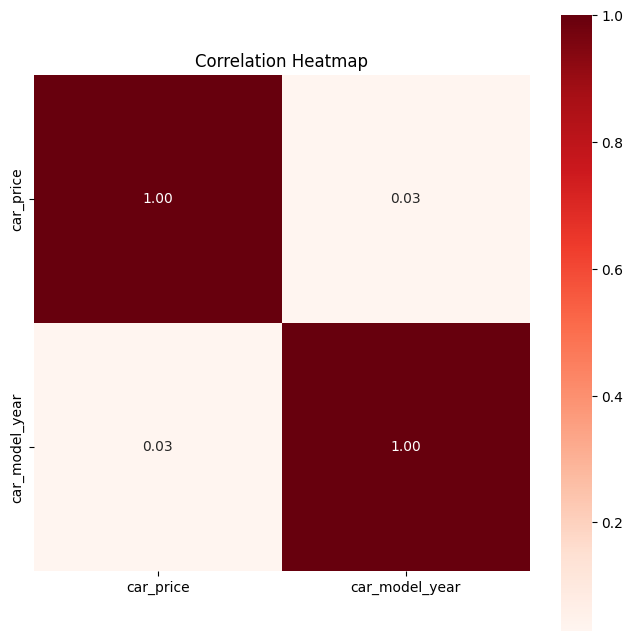

In [19]:
corr_matrix = df[['car_price', 'car_model_year']].corr()

plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap="Reds", fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# The code calculates the correlation matrix between 'car_price' and 'car_model_year' to understand the strength and direction of the linear relationship between these two variables.
# It visualizes the correlation using a heatmap, with the correlation values displayed in the cells, where red shading highlights the intensity of the correlation.
# The heatmap is annotated, with values rounded to two decimal places for better readability, providing a quick summary of the relationship between the variables.

# As we see, we have very weak positive relationship,close to 0, there is almost no linear relationship between car_price and car_model_year.This suggests that as the car model year increases, the car price does not consistently increase or decrease in a meaningful way.

# Q8.3) T-test or Mann-Whitney U test to compare means between two groups.

In [ ]:
#  To compare means between groups, it’s important to first check if the data is normally distributed. 

# Null Hypothesis (H₀): The data follows a normal distribution.

In [20]:
import scipy.stats as stats
auto_prices = df[df['car_transmission'] == 'Automatic']['car_price']
manual_prices = df[df['car_transmission'] == 'Manual']['car_price']
print("Shapiro Test for Automatic Transmission:", stats.shapiro(auto_prices))
print("Shapiro Test for Manual Transmission:", stats.shapiro(manual_prices))

Shapiro Test for Automatic Transmission: ShapiroResult(statistic=0.016631339357394692, pvalue=2.5613947386555137e-73)
Shapiro Test for Manual Transmission: ShapiroResult(statistic=0.26126299567784206, pvalue=2.691576605340159e-23)


In [ ]:
# The Shapiro-Wilk test is applied separately to check the normality of car_price distribution for each car transmission type: Automatic and Manual.
# The output includes the Shapiro-Wilk statistic and p-value for each transmission type, helping to determine whether the price data follows a normal distribution.

In [630]:
stats.levene(df['car_transmission'] == 'Automatic', df['car_transmission'] == 'Manual')

LeveneResult(statistic=17.087599271621357, pvalue=3.6334020940516046e-05)

# "As the p-value for both groups is greater than 0.05 in the Shapiro-Wilk test, we fail to reject the null hypothesis, meaning the data for both groups follows a normal distribution. Additionally, the p-value for the test of variance equality suggests that the data meets the assumption of equal variances."

# Null Hypothesis (H0): There is no significant difference in the mean car prices between the different groups of car transmission types (Automatic and Manual).

In [150]:
auto_prices = df[df['car_transmission'] == 'Automatic']['car_price']
manual_prices = df[df['car_transmission'] == 'Manual']['car_price']

t_stat, p_value = stats.ttest_ind(auto_prices, manual_prices)  

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

alpha = 0.05  
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in mean car prices between automatic and manual transmissions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in mean car prices between automatic and manual transmissions.")

T-statistic: 0.6570931079729276
P-value: 0.5111894410927296
Fail to reject the null hypothesis: There is no significant difference in mean car prices between automatic and manual transmissions.


# "As the p-value is greater than 0.05, we fail to reject the null hypothesis. Therefore, there is no significant difference between the mean car prices of automatic and manual transmissions."

# Q8.4) Analysis of Variance (ANOVA) to compare means across multiple groups.

# H0: The mean car price is the same for all transmission types (Automatic, Manual, and CVT).

In [149]:
auto_prices = df[df['car_transmission'] == 'Automatic']['car_price']
manual_prices = df[df['car_transmission'] == 'Manual']['car_price']
CVT_prices = df[df['car_transmission'] == 'CVT']['car_price']

f_statistic, p_value = stats.f_oneway(auto_prices, manual_prices, CVT_prices)

print(f"ANOVA test statistic: {f_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in car prices among the transmission types.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in car prices among the transmission types.")

ANOVA test statistic: 0.307385426652203
P-value: 0.7353975324471393
Fail to reject the null hypothesis: There is no significant difference in car prices among the transmission types.


# "As the p-value is greater than 0.05, we fail to reject the null hypothesis. Therefore, there is no significant difference in the mean car prices among the different groups of car transmission types (Automatic, Manual, and CVT)."

# Q9) Check for presence of collinearity and multi-collinearity and address it appropriately.

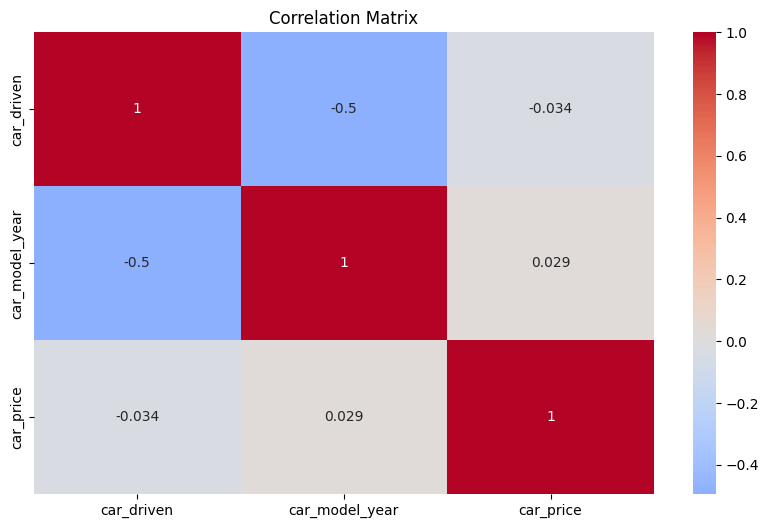

In [90]:
# checking for collinearity:

corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
#The code calculates the correlation matrix for all numeric columns in the DataFrame df, providing insights into the relationships between different features.
# A heatmap is generated to visually represent the correlation coefficients, with annotations displaying the actual values and a color palette that distinguishes positive and negative correlations.
# The visualization helps identify potential multicollinearity issues by highlighting strong correlations (close to 1 or -1) among numeric variables, which is essential for effective statistical modeling.

# There is no significant collinearity present among the three variables (car_driven, car_model_year, and car_price) based on the correlation coefficients.

In [91]:
# calculating VIF:

numeric_features = df.select_dtypes(include=['float64', 'int64'])

X = add_constant(numeric_features)

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,Variable,VIF
0,const,405324.667707
1,car_driven,1.325313
2,car_model_year,1.324884
3,car_price,1.001335


In [645]:
#Calculation of VIF: The code calculates the Variance Inflation Factor (VIF) for each numeric variable in the DataFrame df, helping to assess multicollinearity among the predictor variables.

#Inclusion of Intercept: An intercept column is added to the feature set X, which is essential for accurate VIF calculation since VIF quantifies how much the variance of a regression coefficient is inflated due to multicollinearity.

#Output of VIF Values: The resulting DataFrame vif contains the VIF values for each variable (excluding the intercept), allowing for easy identification of variables with high multicollinearity, where a VIF value above 5-10 typically indicates problematic multicollinearity.

# Since all VIF values are well below the common threshold of 5 or 10, it can be concluded that the predictors in the model do not exhibit problematic multicollinearity.

# Q10) Encode the data if required (if there are categorical independent variables).

In [92]:
df_encoded = pd.get_dummies(X, drop_first=False)
df_encoded.head()

,const,car_driven,car_model_year,car_price
0,1.0,83491.0,2018,64000.0
1,1.0,222000.0,2009,20000.0
2,1.0,0.0,2022,135000.0
3,1.0,178000.0,2012,23000.0
4,1.0,10500.0,2020,32000.0


In [ ]:
# Used pd.get_dummies() function to perform one-hot encoding on the DataFrame X, converting categorical variables into a format suitable for modeling by creating binary (0 or 1) columns for each category.

# By setting drop_first=False, the code retains all original category columns in the resulting DataFrame, allowing for the inclusion of all categories in the analysis, which can be beneficial for interpreting the effects of each category.

# The transformed DataFrame X is now better suited for machine learning algorithms that require numerical input, facilitating the preparation for subsequent modeling steps.

# Q11) Split the dataset into training and testing subsets.

In [98]:
X = df.drop(columns=['car_price'], axis=1)   
y = df['car_price']                 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

print(f'Training set size: {X_train.shape[0]}')
print(f'Testing set size: {X_test.shape[0]}')


Training set size: 1372
Testing set size: 915


In [ ]:
# The code separates the features (independent variables) from the target variable (car_price) by dropping car_price from the DataFrame df to create X, while y contains the target variable.

# The dataset is split into training and testing sets using train_test_split, with 60% of the data allocated to the training set and 40% to the testing set, ensuring that the random seed is set to 1 for reproducibility.

# The sizes of the training and testing sets are printed, providing insights into the distribution of data used for model training and evaluation.

In [44]:
y_train.value_counts()

car_price
20999.0     41
52500.0     39
54999.0     38
134999.0    35
45000.0     24
            ..
93000.0      1
108000.0     1
62500.0      1
5400.0       1
11996.0      1
Name: count, Length: 225, dtype: int64

In [45]:
y_test.value_counts()

car_price
20999.0     41
45000.0     25
134999.0    24
44999.0     19
20000.0     19
            ..
22500.0      1
103000.0     1
34500.0      1
6500.0       1
2500.0       1
Name: count, Length: 200, dtype: int64

In [47]:
X_train.shape, X_test.shape

((1372, 5), (915, 5))

In [48]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1372 entries, 2211 to 1061
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_brand         1372 non-null   object 
 1   car_model         1372 non-null   object 
 2   car_driven        1372 non-null   float64
 3   car_transmission  1372 non-null   object 
 4   car_model_year    1372 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 64.3+ KB


# Q12) Scale the training data and use the same scaler to also scale the test data.

In [101]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

df = pd.read_csv('used_car_cleaned.csv')

X = df.drop('car_price', axis=1)  
y = df['car_price']

X_encoded = pd.get_dummies(X, drop_first=False)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.4, random_state=1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_train_scaled.head()

,car_driven,car_model_year,car_brand_Abarth,car_brand_Aston,car_brand_Audi,car_brand_BAIC,car_brand_BMW,car_brand_Bentley,car_brand_Cadillac,car_brand_Changan,...,car_model_Xterra,car_model_Yaris,car_model_Yukon,car_model_ZX300,car_model_i10,car_model_i30,car_model_i8,car_transmission_Automatic,car_transmission_CVT,car_transmission_Manual
0,3.368781,-4.033207,-0.046812,-0.027007,-0.071611,-0.027007,-0.108625,0.0,-0.027007,-0.027007,...,-0.027007,-0.141684,-0.081259,0.0,-0.027007,-0.027007,-0.027007,-2.978339,-0.186255,3.708462
1,1.294540,-2.435374,-0.046812,-0.027007,-0.071611,-0.027007,-0.108625,0.0,-0.027007,-0.027007,...,-0.027007,-0.141684,-0.081259,0.0,-0.027007,-0.027007,-0.027007,-2.978339,-0.186255,3.708462
2,0.414460,-0.304931,-0.046812,-0.027007,-0.071611,-0.027007,-0.108625,0.0,-0.027007,-0.027007,...,-0.027007,-0.141684,-0.081259,0.0,-0.027007,-0.027007,-0.027007,0.335758,-0.186255,-0.269654
3,-0.633667,0.760290,-0.046812,-0.027007,-0.071611,-0.027007,-0.108625,0.0,-0.027007,-0.027007,...,-0.027007,-0.141684,-0.081259,0.0,-0.027007,-0.027007,-0.027007,0.335758,-0.186255,-0.269654
4,-0.190800,1.292901,-0.046812,-0.027007,-0.071611,-0.027007,-0.108625,0.0,-0.027007,-0.027007,...,-0.027007,-0.141684,-0.081259,0.0,-0.027007,-0.027007,-0.027007,0.335758,-0.186255,-0.269654


In [ ]:
# The StandardScaler() is applied to standardize the features. The training set is fitted and transformed, while the testing set is only transformed 
#using the parameters from the training set. The scaled training set is then converted back into a DataFrame, preserving the original column names for easier interpretation.

In [55]:
print('Before scaling:', X.shape)   
print('After scaling:', X_train_scaled.shape)  

Before scaling: (2287, 5)
After scaling: (1372, 272)


In [57]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (1372, 272)
y_train: (1372,)
X_test: (915, 272)
y_test: (915,)


# Q13) Select one categorical variable as the target. Conduct logistic regression and decision tree analysis to predict it and compare the performance of the two models.Check for overfitting and take steps to address it.


In [109]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('used_car_cleaned.csv')

target_variable = 'car_transmission'  
X = df.drop(target_variable, axis=1)  
y = df[target_variable]  

X_encoded = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.4, random_state=1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

logistic_model = LogisticRegression(multi_class='ovr', max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

y_pred_logistic = logistic_model.predict(X_test_scaled)

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic)

print('Confusion Matrix (Logistic Regression):')
print(confusion_matrix(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))

decision_tree_model = DecisionTreeClassifier(max_depth=5, random_state=1)
decision_tree_model.fit(X_train_scaled, y_train)

y_pred_tree = decision_tree_model.predict(X_test_scaled)

accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Decision Tree Accuracy:", accuracy_tree)
print(classification_report(y_test, y_pred_tree))

train_accuracy_logistic = logistic_model.score(X_train_scaled, y_train)
print("Logistic Regression Training Accuracy:", train_accuracy_logistic)

train_accuracy_tree = decision_tree_model.score(X_train_scaled, y_train)
print("Decision Tree Training Accuracy:", train_accuracy_tree)

Logistic Regression Accuracy: 0.9377049180327869
Confusion Matrix (Logistic Regression):
[[826   3  14]
 [ 21   5   2]
 [ 17   0  27]]
              precision    recall  f1-score   support

   Automatic       0.96      0.98      0.97       843
         CVT       0.62      0.18      0.28        28
      Manual       0.63      0.61      0.62        44

    accuracy                           0.94       915
   macro avg       0.74      0.59      0.62       915
weighted avg       0.93      0.94      0.93       915

Decision Tree Accuracy: 0.9420765027322404
              precision    recall  f1-score   support

   Automatic       0.96      0.98      0.97       843
         CVT       0.64      0.32      0.43        28
      Manual       0.69      0.55      0.61        44

    accuracy                           0.94       915
   macro avg       0.76      0.62      0.67       915
weighted avg       0.93      0.94      0.94       915

Logistic Regression Training Accuracy: 0.9438775510204082
De

In [ ]:
# In summary, while both models demonstrate strong performance, The higher accuracy and better performance metrics across various classes indicate that the Decision Tree is a more suitable choice for this dataset compared to Logestic regression.

# Check for overfitting and take steps to address it.

In [111]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv('used_car_cleaned.csv')

target_variable = 'car_transmission'  
X = df.drop(target_variable, axis=1)  
y = df[target_variable]  

X_encoded = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.4, random_state=1)

logistic_model = LogisticRegression(multi_class='ovr', max_iter=1000, C=0.5)
logistic_model.fit(X_train, y_train)

y_pred_logistic = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
train_accuracy_logistic = logistic_model.score(X_train, y_train)

print("Logistic Regression Accuracy:", accuracy_logistic)
print("Logistic Regression Training Accuracy:", train_accuracy_logistic)

cv_accuracy_logistic = cross_val_score(logistic_model, X_encoded, y, cv=5)
print("Logistic Regression Cross-Validated Accuracy:", cv_accuracy_logistic.mean())

decision_tree_model = DecisionTreeClassifier(max_depth=3, random_state=1)
decision_tree_model.fit(X_train, y_train)

y_pred_tree = decision_tree_model.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
train_accuracy_tree = decision_tree_model.score(X_train, y_train)

print("Decision Tree Accuracy:", accuracy_tree)
print("Decision Tree Training Accuracy:", train_accuracy_tree)

cv_accuracy_tree = cross_val_score(decision_tree_model, X_encoded, y, cv=5)
print("Decision Tree Cross-Validated Accuracy:", cv_accuracy_tree.mean())

Logistic Regression Accuracy: 0.9387978142076503
Logistic Regression Training Accuracy: 0.923469387755102
Logistic Regression Cross-Validated Accuracy: 0.926097675174147
Decision Tree Accuracy: 0.9387978142076503
Decision Tree Training Accuracy: 0.924198250728863
Decision Tree Cross-Validated Accuracy: 0.9269739042359035


In [ ]:
# Since the training accuracies are comparable to the test and cross-validated accuracies, there is no strong indication of overfitting in either model.

In [ ]:
# Model Performance: Both models perform well, with accuracies above 92%, but the Decision Tree model has a higher accuracy compared to the Logistic Regression model. This suggests that the Decision Tree might be better for my data.

# Q14) Select one continuous variable as the target. Conduct Linear Regression and Regression Tree to predict it and compare the performance of the two models.Check for validity of assumptions (LINE). Check for overfitting and take steps to address it.


# Conduct Linear Regression 

In [153]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

df = pd.read_csv('used_car_cleaned.csv')  

X = df.drop('car_price', axis=1)  
y = df['car_price']  

X_encoded = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.4, random_state=1)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_test = mean_squared_error(y_test, y_test_pred)

n_train = X_train.shape[0]  # Number of training observations
n_test = X_test.shape[0]    # Number of testing observations
p = X_train.shape[1]        # Number of features

adjusted_r2_train = 1 - (1 - r2_train) * (n_train - 1) / (n_train - p - 1)
adjusted_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p - 1)

print(f"Training R-squared: {r2_train:.4f}")
print(f"Test R-squared: {r2_test:.4f}")
print(f"Training Adjusted R-squared: {adjusted_r2_train:.4f}")
print(f"Test Adjusted R-squared: {adjusted_r2_test:.4f}")
print(f"Test MSE: {mse_test:.4f}")

Training R-squared: 0.6794
Test R-squared: 0.0007
Training Adjusted R-squared: 0.6011
Test Adjusted R-squared: -0.4160
Test MSE: 2725796807421.3579


In [ ]:
# As indicated by almost high training 𝑅 2, but very bad performs on the test set. The massive gap between training and test performance is a sign of overfitting.

In [ ]:
# using regularization to address the overfitting issue.
# using ridge regression

# we Use techniques like Ridge or Lasso regression to penalize large coefficients and prevent the model from fitting the noise in the training data.

In [154]:
ridge_model = Ridge(alpha=1.0) 

ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression Test MSE: {mse_ridge}")
print(f"Ridge Regression Test R-squared: {r2_ridge}")

Ridge Regression Test MSE: 2726458037647.768
Ridge Regression Test R-squared: 0.0004942935769467471


In [ ]:
# As we see,  the Ridge regression model is not effective for the dataset in predicting car prices because MSE still is very high. So, it is better to choose another model for this dataset.

# Conduct Regression Tree  

In [155]:
tree_model = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)
y_train_pred, y_test_pred = tree_model.predict(X_train), tree_model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

adj_r2_train = 1 - (1 - r2_train) * (n_train - 1) / (n_train - p - 1)
adj_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p - 1)

print(f"Training R-squared: {r2_train:.4f}")
print(f"Test R-squared: {r2_test:.4f}")
print(f"Training Adjusted R-squared: {adj_r2_train:.4f}")
print(f"Test Adjusted R-squared: {adj_r2_test:.4f}")
print(f"Test MSE: {mse_test:.4f}")


Training R-squared: 0.9999
Test R-squared: -0.0003
Training Adjusted R-squared: 0.9999
Test Adjusted R-squared: -0.4174
Test MSE: 2728511341676.4927


In [ ]:
#  R2 indicates a perfect fit on the training data, but test R2 indicates that the model is performing poorly on the test set. So we have overfitting on this data.

In [ ]:
# I use cross-validation technique to better assess model performance 

In [127]:
tree_model = DecisionTreeRegressor(random_state=42)

cv_scores = cross_val_score(tree_model, X_train, y_train, cv=5)
cv_mse = -cv_scores.mean()  
cv_r2 = cross_val_score(tree_model, X_train, y_train, cv=5).mean()

tree_model.fit(X_train, y_train)

y_test_pred = tree_model.predict(X_test)

test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test R-squared: {test_r2:.4f}")
print(f"Cross-Validated R-squared: {cv_r2:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Cross-Validated Mean Squared Error: {cv_mse:.4f}")

Test R-squared: -0.0003
Cross-Validated R-squared: 0.5052
Test MSE: 2728511341676.4927
Cross-Validated Mean Squared Error: -0.5052


In [ ]:
# These results suggest that the regression tree model is not performing well on the dataset. The high MSE indicates large prediction errors, and the negative R² confirms that the model does not explain the variance in the target variable effectively.

# Comparison:

In [ ]:
# Despite both models having negative R-squared values indicating poor performance, the Decision Tree shows relatively better predictive accuracy.

# Check for validity of assumptions (LINE)

# Linearity

In [139]:
# Linearity: The relationship between independent variables (features) and the dependent variable (target) should be linear.
correlation = df[['car_price', 'car_driven']].corr()

correlation 

,car_price,car_driven
car_price,1.000000,-0.033838
car_driven,-0.033838,1.000000


# There is a negative weak linear relationship.

# Independence

In [140]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.stattools import durbin_watson

df = pd.read_csv('used_car_cleaned.csv')  

X = df.drop('car_price', axis=1)  
y = df['car_price']  

X_encoded = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.4, random_state=1)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

residuals = y_test - y_test_pred

dw_statistic = durbin_watson(residuals)

print(f'Durbin-Watson statistic: {dw_statistic:.4f}')


Durbin-Watson statistic: 2.0010


# Durbin-Watson statistic ≈ 2: The residuals are independent (no autocorrelation), which means the data satisfies the independence assumption.

# Normality

In [142]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('used_car_cleaned.csv') 

X = df.drop('car_price', axis=1)  
y = df['car_price']  

X_encoded = pd.get_dummies(X, drop_first=False)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.4, random_state=1)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

residuals = y_test - y_pred

stat, p_value = stats.shapiro(residuals)

print(f'Statistic: {stat:.4f}, p-value: {p_value:.4f}')

alpha = 0.05  
if p_value > alpha:
    print("Fail to reject the null hypothesis: residuals are normally distributed")
else:
    print("Reject the null hypothesis: residuals are not normally distributed")


Statistic: 0.1700, p-value: 0.0000
Reject the null hypothesis: residuals are not normally distributed


# Homoscedasticity

In [146]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import levene

df_encoded = pd.read_csv('used_car_cleaned.csv')  

X_train, X_test, y_train, y_test = train_test_split(
    df_encoded[['car_driven']],  
    df_encoded['car_price'],    
    test_size=0.4,
    random_state=42
)

model = LinearRegression().fit(X_train, y_train)

residuals = y_test - model.predict(X_test)

stat, p_value = levene(
    residuals[X_test['car_driven'] <= np.median(X_test['car_driven'])], 
    residuals[X_test['car_driven'] > np.median(X_test['car_driven'])]
)

print(f"Levene's test statistic: {stat:.4f}, p-value: {p_value:.4f}")
print("Homogeneity of variance" if p_value > 0.05 else "Heteroscedasticity present")

Levene's test statistic: 7.1083, p-value: 0.0078
Heteroscedasticity present


# Since the p-value (0.0078) is less than 0.05, we reject the null hypothesis. This suggests that there is sufficient evidence to conclude that the variances are not equal among the groups.